In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [0]:
filename ='/content/drive/My Drive/YearPredictionMSD.csv'

In [0]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [0]:
rows = []

Loading data file and reading into arrays

In [0]:
with open(filename, 'r') as csvfile:
  csvreader = csv.reader(csvfile)
  for row in csvreader:
    rows.append(row)

In [0]:
  A = np.array(rows)
  A[:,0]
  A = A.astype(np.float)

In [0]:
train_len = 463715
test_len = 51630

In [0]:
y = A[0:train_len,0:1].copy()
y.shape


(463715, 1)

In [0]:
y.shape

(463715, 1)

In [0]:
X = A[0:train_len,:].copy()
X[0:train_len,0] = 1
X.shape


(463715, 91)

In [0]:
# ########### Multi Linear Regression ####################
# B = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),Y))
# y_tr = np.dot(X,B)



In [0]:
Serr = 0
SAerr = 0
count = 0
SSerr = 0
MSerr = 0

diff = y_tr - y  
for i in range(0, train_len):
  Serr = Serr + y_tr[i,0] - y[i,0] 
  SAerr = SAerr + abs(y[i,0]-y_tr[i,0])
  SSerr = SSerr + ( (y[i,0]-y_tr[i,0])*(y[i,0]-y_tr[i,0]) )
  MSerr = MSerr + ( (y[i,0]-y_tr[i,0])*(y[i,0]-y_tr[i,0]) )

MSerr = MSerr/(train_len-91)
xyz = (abs(diff)<=2).sum()
print(" No of correct predictions = " + str(xyz))
print(" Percentage correct predictions = " + str( xyz / train_len))
print("Sum err: "+ str(Serr))
print("Sum abs err: "+ str(SAerr))
print("MS Res:: "+ str(MSerr) )

 No of correct predictions = 970
 Percentage correct predictions = 0.002091802076706598
Sum err: -35421371.99999993
Sum abs err: 35421372.006456
MS Res:: 5955.667840916602


In [0]:
import math

n = train_len

K = 90

AIC = n*math.log(SSerr/n) + 2*K
BIC = n*math.log(SSerr/n) + K*math.log(n)

print("AIC = "+str(AIC))
print("BIC = "+ str(BIC))

AIC = 4030746.5044289883
BIC = 4031740.7367166406


In [0]:
############3LINEAR Regression DOne#######


Counting the year frequency in training data ( year range is 1922 to 2011)

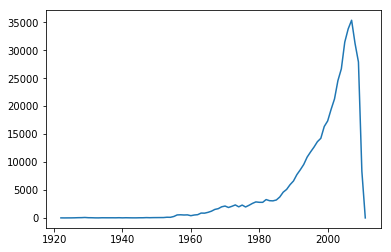

In [0]:
count = np.zeros((2012-1922,1))
for i in range(0,train_len):
  count[int(y[i,0]-1922),0]+=1
years = range(1922,2012)
plt.plot(years, count)
#plt.bar(2012-1922, count, align='center', alpha=0.2) bar plot nahi ban raha

Normalizing the data

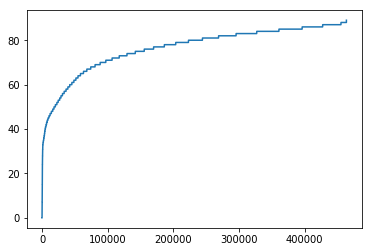

In [0]:
y = y - y.min()
m = X.min()
n = X.max()
X = (X - m)/(n - m)
plt.plot(sorted(y))

In [0]:
y

array([[79.],
       [79.],
       [79.],
       ...,
       [85.],
       [84.],
       [85.]])

Working on the new logistic model, using vectors for each year.

In [0]:
Y = np.zeros((train_len,90))
for i in range(0,train_len):
  Y[i,int(y[i,0])] = 1
Y[0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [0]:
B = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),Y))
B[0,0]

0.8596232078705444

Checking for residuals:

In [0]:
ANS = np.dot(X,B)
ans = np.zeros((np.size(ANS,0),1))   ### predictions insample
for i in range(0,np.size(ANS,0)):
  ans[i,0] = np.argmax(ANS[i,:])
res = ans - y
MSres = 0
print(np.max(res))
for i in range(0,np.size(ANS,0)):
  MSres = MSres + (res[i,0] * res[i,0])
MSres = MSres / ( np.size(ANS,0) - 91 )
MSres

86.0


149.68774548395794

Checking prediction on training data:

In [0]:
X_test = A[train_len:,:].copy()
X_test[:,0] = 1
X_test[0,:]

array([ 1.00000000e+00,  4.54420000e+01, -3.07497600e+01,  3.17858700e+01,
        4.63569000e+00, -1.51489400e+01,  2.33700000e-01, -1.19796800e+01,
       -9.59708000e+00,  6.48111000e+00, -8.89073000e+00,  4.02405000e+00,
       -2.28873000e+00,  1.79020400e+01,  1.37712225e+03,  1.76204257e+03,
        9.47344300e+02,  5.62281400e+02,  5.24268110e+02,  3.61254100e+02,
        5.14535070e+02,  2.47701260e+02,  3.99788800e+02,  2.05365210e+02,
        2.11868700e+02,  4.48897100e+01, -2.99639230e+02, -2.27641690e+02,
        7.34210000e+00, -8.58005700e+01,  1.68121100e+01, -4.11858100e+01,
       -1.20085800e+01, -4.19211700e+01, -2.65231200e+01, -1.21976500e+01,
        8.96110400e+01, -2.66078340e+02, -2.30312230e+02, -1.68296090e+02,
        3.84037100e+01,  3.18401600e+01,  2.89807100e+01, -9.87344700e+01,
        2.64656500e+01, -3.02327200e+01, -1.34637000e+00,  2.53369450e+02,
        6.17342400e+01,  1.61576500e+01,  1.85248680e+02,  7.55724400e+01,
        5.51736700e+01, -

Normalizing the test data:

In [0]:
X_test = (X_test - m)/(n - m)
y_test = A[train_len:,0:1].copy()
y_test.shape
y_test[0,0]

2007.0

Getting predictions:

In [0]:
Y_pred = np.dot(X,B)
y_pred = np.zeros((np.size(Y_pred,0),1))
for i in range(0,np.size(Y_pred,0)):
  y_pred[i,0] = np.argmax(Y_pred[i,:]) + 1922
diff = y_pred - y_test
MSres = 0
for i in range(0,np.size(Y_pred,0)):
  MSres = MSres + (diff[i,0] * diff[i,0])
MSres = MSres / (np.size(Y_pred,0) -91)
MSres

159.9588223900833

Checking with linear model:

In [0]:
x = A[0:train_len,:].copy()
x[0:train_len,0] = 1
B_lin = np.dot(np.linalg.inv(np.dot(np.transpose(x),x)),np.dot(np.transpose(x),y))
y_test = A[train_len:,0:1].copy()
x_test = A[train_len:,:].copy()
x_test[:,0] = 1
diff_lin = np.dot(x_test,B_lin) - y_test
(diff_lin == 0).sum()
diff_lin.min()

-1971.1458061416201

Instead of taking max entry as predicted year, lets check for minimum norm.

In [0]:
y_pred = np.zeros((np.size(Y_pred,0),1))
for i in range(0,np.size(Y_pred,0)):
  mini = 99999.0
  index = 0
  for j in range(0,np.size(Y_pred,1)):
    ej = np.zeros((1,np.size(Y_pred,1)))
    ej[0,j] = 1
    dev = np.dot((Y_pred[i,:] - ej),np.transpose(Y_pred[i,:] - ej))
    if dev < mini:
      mini = dev
      index = j
  y_pred[i,0] = index + 1922
diff = y_pred - y_test
MSres = 0
for i in range(0,np.size(Y_pred,0)):
  MSres = MSres + (diff[i,0] * diff[i,0])
MSres = MSres / (np.size(Y_pred,0)-91)
MSres

159.9588223900833

In [0]:
diff.max()

65.0

Checking multicollinearity:

In [0]:
np.linalg.det(np.dot(np.transpose(X),X))

2.152650920630086e-32

In [0]:
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import Ridge

In [0]:
ridge = Ridge(alpha=0.15)
ridge.fit(X,y)

Ridge(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
#Beta =np.transpose(ridge.coef_)
Y_tr = ridge.predict(X)
Y_tr = np.round(Y_tr)
Y_tr

array([[75.],
       [76.],
       [75.],
       ...,
       [75.],
       [81.],
       [74.]])

In [0]:
Serr = 0
SAerr = 0
count = 0
SSerr = 0
MSerr = 0
y_tr = Y_tr
# y_tr = np.zeros((np.size(Y_tr,0),1))
# for i in range(0,np.size(Y_pred,0)):
#   y_tr[i,0] = np.argmax(Y_tr[i,:])
diff = y_tr - y
for i in range(0, train_len):
  Serr = Serr + y_tr[i,0] - y[i,0] 
  SAerr = SAerr + abs(y[i,0]-y_tr[i,0])
  SSerr = SSerr + ( (y[i,0]-y_tr[i,0])*(y[i,0]-y_tr[i,0]) )
  MSerr = MSerr + ( (y[i,0]-y_tr[i,0])*(y[i,0]-y_tr[i,0]) )

MSerr = MSerr/(train_len-91)
xyz = (abs(diff)<=2).sum()
print(" No of correct predictions = " + str(xyz))
print(" Percentage correct predictions = " + str( xyz / train_len))
print("Sum err: "+ str(Serr))
print("Sum abs err: "+ str(SAerr))
print("MS Res:: "+ str(MSerr) )

 No of correct predictions = 92631
 Percentage correct predictions = 0.1997584723375349
Sum err: 143.0
Sum abs err: 3536607.0
MS Res:: 106.5383855486654


for ridge regression normal wala

No of correct predictions = 92631
 Percentage correct predictions = 0.1997584723375349
Sum err: 143.0
Sum abs err: 3536607.0
MS Res:: 106.5383855486654
AIC = 2164945.948665589
BIC = 2165940.1809532414

In [0]:
import math

n = train_len

K = 90

AIC = n*math.log(SSerr/n) + 2*K
BIC = n*math.log(SSerr/n) + K*math.log(n)

print("AIC = "+str(AIC))
print("BIC = "+ str(BIC))

AIC = 2164945.948665589
BIC = 2165940.1809532414


n = 60
AIC = 3977760.0725924387
BIC = 3978754.304880091

n= 55
AIC = 3977760.471157472
BIC = 3978754.7034451244

n = 85
AIC = 3977760.4655094105
BIC = 3978754.697797063

n = 80
AIC = 3977747.457653259
BIC = 3978741.6899409113

n = 75  lambda  = 0.5
AIC = 3977747.112735172
BIC = 3978741.345022824

 n = 75 lambda  = 0.25
 AIC = 3977735.9865416763
BIC = 3978730.2188293287

n = 75 lambda = 0.15
AIC = 3977728.1949407365
BIC = 3978722.427228389

n = 70 lambda = 0.15
AIC = 3977729.193586414
BIC = 3978723.4258740665

n = 70 lambda = 0.25
AIC = 3977736.4628864224
BIC = 3978730.6951740747



In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=85)

X1 = pca.fit_transform(X)

In [0]:

pca = PCA(n_components=75)

In [0]:
X1 = pca.fit_transform(X)

In [0]:
print(X.shape)
print(X1.shape)


(463715, 91)
(463715, 75)


In [0]:
np.linalg.det(np.dot(np.transpose(X1),X1))

1355488410164979.5

In [0]:
X1

array([[-2410.11251647,    26.20044223,   124.81117857, ...,
          -20.77002006,   -35.16298062,   -68.78357581],
       [-1434.70788008,  1127.89955598,  -234.85348477, ...,
          160.48362111,    23.40557211,   -72.99639208],
       [-2338.01454481,    19.31792167,    33.85140074, ...,
          178.72894888,   -23.2624885 ,   -34.12979752],
       ...,
       [-1739.57137809,   555.98441052,   248.04815099, ...,
          -23.13775568,   -29.58644359,     9.14864698],
       [  -46.7611147 ,  1226.85102277,  -763.22991155, ...,
         -198.33002771,    39.77173972,   -45.55341257],
       [-3131.73274781,   417.30136998,   -68.2108994 , ...,
          -62.43651148,    -6.4713389 ,   -32.4854088 ]])

In [0]:

# from sklearn.feature_selection import RFE
# from sklearn.svm import SVR
# #X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
# estimator = SVR(kernel="linear")
# selector = RFE(estimator, step=1)
# selector = selector.fit(X, Y)
# # selector.support_ 

# # selector.ranking_


# # Methods